In [2]:
import gc
import os
os.chdir(r'D:\Desktop\MachineLearning\NLP\NLP新闻分类赛')

In [12]:
import pandas as pd
train_df = pd.read_csv('./data/train_set.csv',sep='\t')

In [25]:
train_df.head()

,label,text,text_len,text_unique
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057,512 4124 4699 657 5814 3706 6093 5949 3605 796...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486,6929 307 512 5858 1386 4124 1924 3915 4350 212...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764,2396 5151 978 512 465 4124 4350 6093 3605 2282...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570,3613 4124 5814 3706 5510 6983 6093 5949 3605 2...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307,307 4498 5858 3695 5814 1457 6093 6065 6314 50...


In [10]:
len(train_df)

200000

In [13]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In [16]:
train_df['text_len'].head()

0    1057
1     486
2     764
3    1570
4     307
Name: text_len, dtype: int64

Text(0.5, 1.0, 'Histogram of char count')

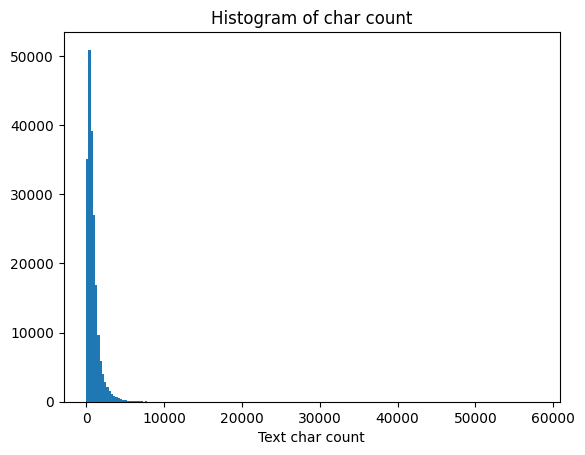

In [17]:
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'],bins=200 )
plt.xlabel('Text char count')
plt.title("Histogram of char count")

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

Text(0.5, 0, 'category')

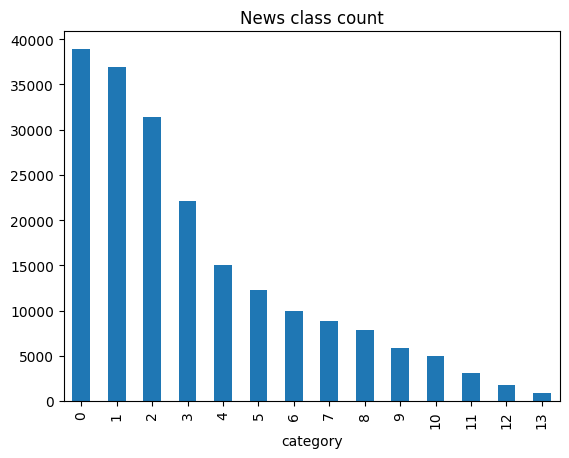

In [18]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

In [19]:
from collections import Counter
# 将 train_df['text'] 列中的元素合并为一个字符串，元素之间用空格分隔
all_lines = ' '.join(list(train_df['text']))
# 使用 Counter 统计 all_lines 中每个单词的出现次数
# all_lines.split(" ") 将字符串按空格拆分为单词列表，Counter 统计列表中每个单词的出现次数
word_count = Counter(all_lines.split(" "))
# 对 word_count 中的元素进行排序，根据元素的出现次数（即键值对中的值）降序排列
# word_count.items() 将 word_count 中的键值对转换为元组列表，lambda d:d[1] 以元组的第二个元素（出现次数）作为排序依据
word_count = sorted(word_count.items(), key=lambda d: d[1], reverse=True)

In [20]:
print(len(word_count))

print(word_count[0])

print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


In [23]:
# 对 train_df['text'] 列中的每个元素进行处理，将元素按空格分割为单词列表，
# 使用 set 去重，再将去重后的列表元素重新用空格拼接为字符串，存储在 'text_unique' 列
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
# 将 'text_unique' 列中的元素合并为一个字符串，元素之间用空格分隔
all_lines = ' '.join(list(train_df['text_unique']))
# 使用 Counter 统计 all_lines 中每个单词的出现次数
# all_lines.split(" ") 将字符串按空格拆分为单词列表，Counter 统计列表中每个单词的出现次数
word_count = Counter(all_lines.split(" "))
# 对 word_count 中的元素进行排序，根据元素的出现次数（即键值对中的值）降序排列
# word_count.items() 将 word_count 中的键值对转换为元组列表，lambda d: int(d[1]) 以元组的第二个元素（出现次数）作为排序依据
word_count = sorted(word_count.items(), key=lambda d: int(d[1]), reverse=True)

In [24]:
print(word_count[0])

print(word_count[1])

print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


In [26]:
# 任务一：分析每篇新闻平均由多少个句子构成
def count_sentences(text):
    # 假设 3750, 900 和 648 是标点符号，使用它们来分割句子
    sentences = text.split('3750')
    num_sentences = len(sentences)
    for sentence in sentences:
        if ' 900 ' in sentence:
            num_sentences += sentence.count('900')
        if ' 648 ' in sentence:
            num_sentences += sentence.count('648')
    return num_sentences

train_df['num_sentences'] = train_df['text'].apply(count_sentences)
average_sentences = train_df['num_sentences'].mean()
print(f"平均每篇新闻的句子数: {average_sentences}")

平均每篇新闻的句子数: 79.885765


In [27]:
 def most_common_char_per_label(label):
        # 筛选出该 label 对应的所有文本
        label_texts = train_df[train_df['label'] == label]['text']
        all_text = ' '.join(label_texts)
        # 去除标点符号 3750, 900 和 648
        all_text = all_text.replace('3750', ' ').replace('900', ' ').replace('648', ' ')
        char_count = {}
        # 遍历所有字符，统计出现次数
        for char in all_text.split():
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
        # 排除标点符号对应的键值对
        char_count.pop(' ', None)
        # 找出出现次数最多的字符
        if char_count:  # 确保 char_count 不为空
            most_common = max(char_count.items(), key=lambda x: x[1])
            return most_common[0], most_common[1]
        else:
            return None, 0
        
# 获取所有唯一的 label
labels = train_df['label'].unique()
for label in labels:
    most_common_char, count = most_common_char_per_label(label)
    print(f"标签 {label} 中出现次数最多的字符是 {most_common_char}，出现次数为 {count}")

标签 2 中出现次数最多的字符是 7399，出现次数为 351894
标签 11 中出现次数最多的字符是 4939，出现次数为 18591
标签 3 中出现次数最多的字符是 6122，出现次数为 187933
标签 9 中出现次数最多的字符是 7328，出现次数为 46477
标签 10 中出现次数最多的字符是 3370，出现次数为 67780
标签 12 中出现次数最多的字符是 4464，出现次数为 51426
标签 0 中出现次数最多的字符是 3370，出现次数为 503768
标签 7 中出现次数最多的字符是 3370，出现次数为 159156
标签 4 中出现次数最多的字符是 4411，出现次数为 120442
标签 1 中出现次数最多的字符是 3370，出现次数为 626708
标签 6 中出现次数最多的字符是 6248，出现次数为 193757
标签 5 中出现次数最多的字符是 6122，出现次数为 159125
标签 8 中出现次数最多的字符是 6122，出现次数为 57345
标签 13 中出现次数最多的字符是 4939，出现次数为 9651


In [30]:
import gc
del train_df
gc.collect()

NameError: name 'train_df' is not defined